<center><img src="https://synapsedatascience.com.br/wp-content/uploads/2020/12/logo-jupyter.png" width="300"/></center>

# 1. Introdução a GeoPandas

![Divisão do GeoPandas](imagens/geopandas_separacao.png)

A biblioteca `geopandas` é uma extensão da biblioteca `pandas` criada para facilitar a manipulação de dados georreferenciados.

__Mas o que são dados georreferenciados?__

Também conhecidos como dados espaciais, geográficos ou geoespaciais, são dados que possuem as informações para localizar objetos ou entidades na superfície da Terra. Essas informações são representadas principalmente pelos dados de __latitude__ e __longitude__.

__Por que eu devo aprender?__

Cientistas de dados lidam com problemas distintos e precisam manipular diferentes tipos de dados, como imagens, áudio e texto. Com a popularização dos dispositivos móveis, como o smartphone, os dados da sua localização são compartilhados a todo momento com diversos aplicativos, e estes aplicativos usam essas informações para fornecer uma serviços de acordo com a sua localização.

__Exemplos de aplicativos que trabalham com dados georreferenciados:__
- Google
- Waze
- iFood
- Uber
- Facebook
- Twitter

__O que você vai aprender nesse curso?__

1. Baixar dados espaciais de sites públicos;
2. Ler, visualizar e salvar dados com a biblioteca GeoPandas;
3. Criar, manipular e realizar operações com objetos geométricos;
4. Criar mapas interativos a partir de dados georreferenciados.

__E tudo isso fazendo uma análise real com dados de roubo de célular em São Paulo.__

__Como instalar a biblioteca geopandas?__

In [5]:
# instalando a biblioteca geopandas com conda
!conda install geopandas -y

# instalando a biblioteca geopandas com pip
#!pip install geopandas

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [7]:
# mostrar a versão da biblioteca
!conda list geopandas

# packages in environment at /home/carlos/miniconda3/envs/synapse:
#
# Name                    Version                   Build  Channel
geopandas                 0.8.1                      py_0  


**`Dica:`** documentação da biblioteca *geopandas*: https://geopandas.org/

Nessa aula também vamos utilizar a biblioteca `matplotlib` para construir figuras.

In [8]:
# instalando a biblioteca matplotlib com conda
!conda install matplotlib -y

# instalando a biblioteca matplotlib com pip
#!pip install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [9]:
# mostrar a versão da biblioteca
!conda list matplotlib

# packages in environment at /home/carlos/miniconda3/envs/synapse:
#
# Name                    Version                   Build  Channel
matplotlib                3.3.2                h06a4308_0  
matplotlib-base           3.3.2            py37h817c723_0  


**`Dica:`** documentação da biblioteca *matplotlib*: https://matplotlib.org/users/index.html

In [10]:
# importar a biblioteca
import geopandas as gpd
import matplotlib.pyplot as plt

# 2. Baixando dados espaciais

Para esta lição vamos baixar os dados dos municípios da cidade de São Paulo.

Você pode encontrar um catálogo de dados por estado no site do IBGE: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/15774-malhas.html?=&t=downloads

Você pode baixar os [dados](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/SP/sp_municipios.zip) com o comando
`wget` (para MacOS use `curl -O`).

Baixe os dados e descompacte na pasta "dados". Na pasta, vamos ter um conjunto de arquivos com o nome "SP_Municipios_2019".

# 3. Lendo arquivos

Tipicamente o primeiro passo para fazer uma análise em python consiste em carregar os dados. Para arquivos espaciais existem vários padrões de arquivos diferentes, entre os mais utilizados, estão: [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) e [GPKG](https://en.wikipedia.org/wiki/GeoPackage).

Com o [Geopandas](http://geopandas.org/io.html) podemos ler todos estes formatos e muitos outros. Ler dados espaciais pode ser feito facilmente com o geopandas usando a função `gpd.read_file()`.

In [11]:
# lendo os dados com o geopandas
data = gpd.read_file('dados/SP_Municipios_2019.shp')

Agora que o arquivo shapefile foi lido na variável `data`, vamos ver o seu formato:

In [12]:
type(data)

geopandas.geodataframe.GeoDataFrame

Podemos ver que o tipo da variável é um `GeoDataFrame`. O objeto GeoDataFrame herda as funcionalidades do `pandas.DataFrame` adicionando operações sobre dados espaciais, usando abordagens semelhantes as estruturas de dados do Pandas (por isso o nome Geopandas). O `GeoDataFrame` possui algumas características especiais e funções internas que facilitam análises de estruturas geométricas.

Vamos dar uma olhada nos nossos dados, mostrando as cinco primeiras linhas com a função `head()`.

In [40]:
data.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.17919 -21.68790, -51.17924 -21.6..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.21948 -22.03920, -47.21784 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73076 -21.94354, -46.73084 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.66057 -22.47957, -46.66064 -22.4..."


# 4. Visualizando os dados

Quando utilizamos dados espaciais, uma boa ideia é explorar os dados utilizando um mapa. Criar um mapa simples de um `GeoDataFrame` é muito fácil: você pode utilizar a função ``.plot()``, que cria um mapa baseado nas geometrias dos dados. Na verdade o geopandas utiliza o matplotlib para criar os mapas.

 - Para usar a função precisamos instalar a biblioteca descartes:  
__utilizando o conda__: conda install -c conda-forge descartes  
__utilizando o pip__: pip install descartes

Vamos testar a função ``.plot()`` e ver como os nosso dados se parecem.

<AxesSubplot:>

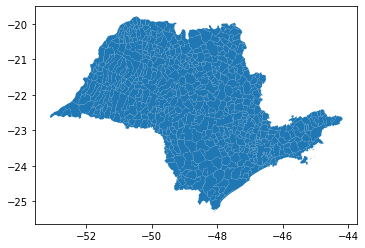

In [14]:
data.plot()

Vamos melhorar a nossa visualização utilizando parâmetros do matplotlib.

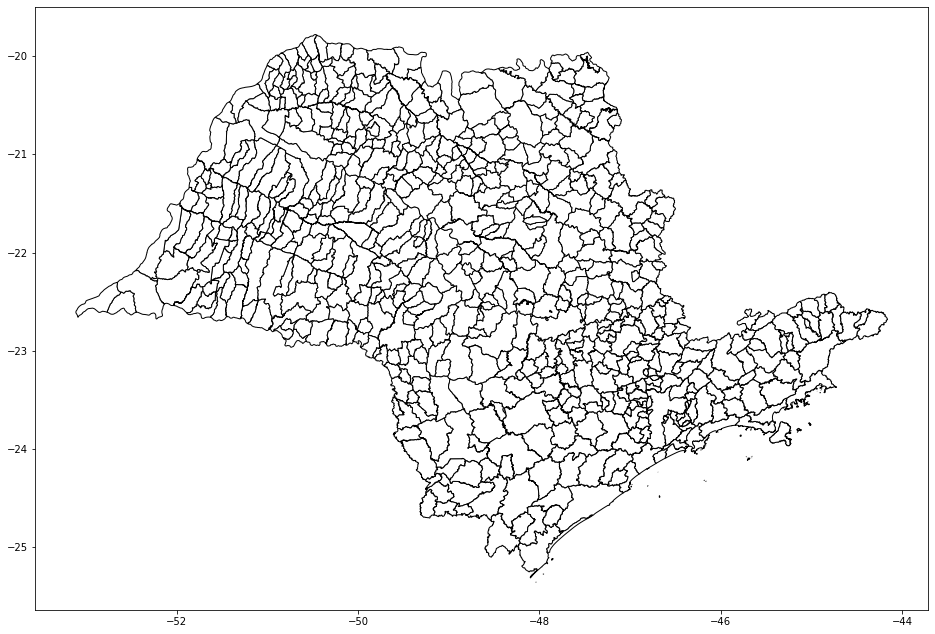

In [15]:
data.plot(figsize=(16, 14), facecolor='white', edgecolor='black')
plt.show()

# 5. Salvando os dados

Uma vantagem do `GeoDataFrame` é a herança das funções do Pandas, utilizando as informações dos dados podemos filtrar uma determinada região:

In [16]:
# vamos filtrar somente a capital 'São Paulo'
gdf_sp = data[data['NM_MUN'] == 'São Paulo']
gdf_sp

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.11,"POLYGON ((-46.63386 -23.42914, -46.63341 -23.4..."


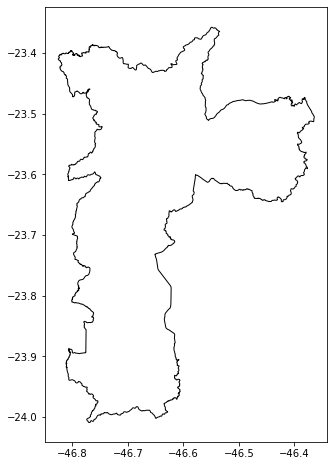

In [17]:
# vamos mostrar a região filtrada
gdf_sp.plot(figsize=(8, 8), facecolor='white', edgecolor='black')
plt.show()

Salvar os dados espaciais utilizando o GeoPandas também é muito fácil.

Vamos salvar apenas o município de São Paulo filtrado acima em um novo arquivo utilizando a função ``to_file()``. Para salvar os arquivos, o geopandas usa o formato padrão Shapefile (.shp), mas também podemos salvar em outros formatos especificando o parâmetro "driver". Nesse exemplo, vamos salvar com o formato "GeoJSON".

In [18]:
# salvar o geodataframe com formato geojson
filename = "dados/capital_são_paulo.json"

gdf_sp.to_file(filename, driver="GeoJSON")

Vamos ler o arquivo criado e ver os dados.

In [19]:
gdf_sp = gpd.read_file(filename)
gdf_sp

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.11,"POLYGON ((-46.63386 -23.42914, -46.63341 -23.4..."


## Resumo

Nesta aula nós vimos os primeiros passos para usar a biblioteca geopandas. Mais especificamente 
voce deve ter aprendido:

**1)** Ler dados usando o geopandas;

**2)** Mostrar os dados lidos em uma visualização;

**3)** Salvar dados GeoDataFrame usando o geopandas.